In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Load the dataset
df = pd.read_csv('c:\\Users\\f-moharami\\Desktop\\Hotel Booking\\hotel_bookings.csv', encoding='ISO-8859-1')

# Preview the first few rows of the data
print("First 5 rows:")
print(df.head())

print("\nData Info:")
print(df.info())


First 5 rows:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Dep

In [3]:
# 1. Check for missing values
print(df.isnull().sum())

# Solution:
# Drop 'company' column as it has too many missing values
df = df.drop('company', axis=1)

# For 'country' and 'agent', fill missing values with specific values
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)

# 2. Remove rows where there are no guests (adults + children + babies)
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~filter]

print("Data Cleaned!")

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Cancellation Rate:
is_canceled
0    62.923412
1    37.076588
Name: proportion, dtype: float64


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2404\937954053.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='Set2')


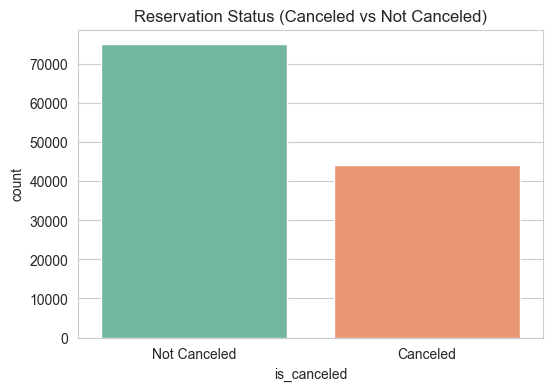

In [4]:
# Calculate the cancellation rate
cancel_percent = df['is_canceled'].value_counts(normalize=True) * 100
print(f"Cancellation Rate:\n{cancel_percent}")

# Plot the cancellation status
plt.figure(figsize=(6, 4))
plt.title("Reservation Status (Canceled vs Not Canceled)")
sns.countplot(x='is_canceled', data=df, palette='Set2')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2404\998031612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel', data=df, palette='pastel')


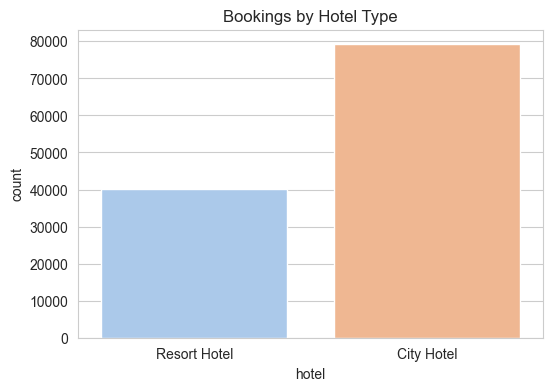

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='hotel', data=df, palette='pastel')
plt.title("Bookings by Hotel Type")
plt.show()


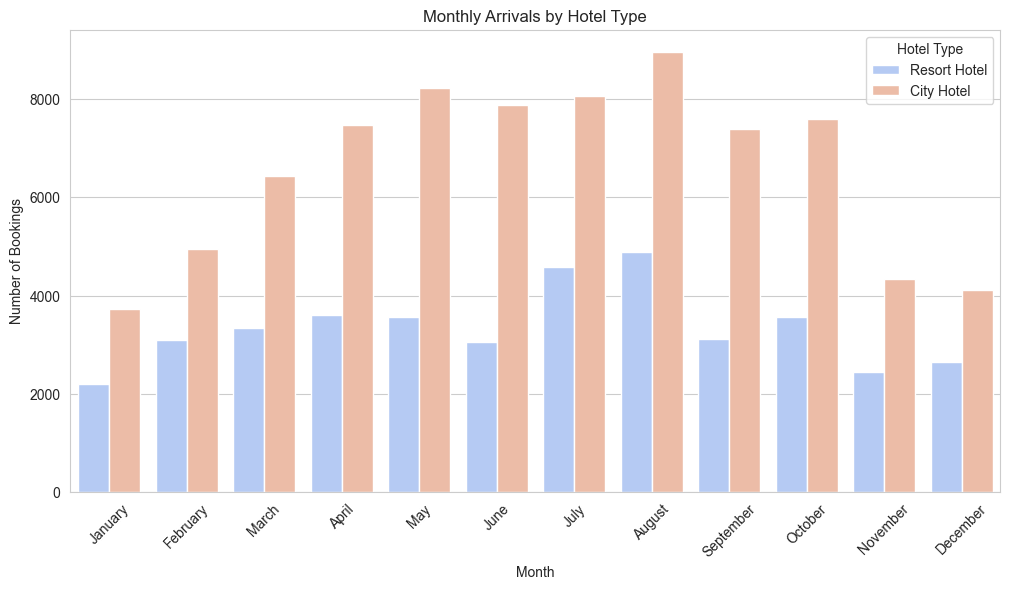

In [6]:
# Set the correct order for months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=df, order=months_order, hue='hotel', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Monthly Arrivals by Hotel Type")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title='Hotel Type')
plt.show()


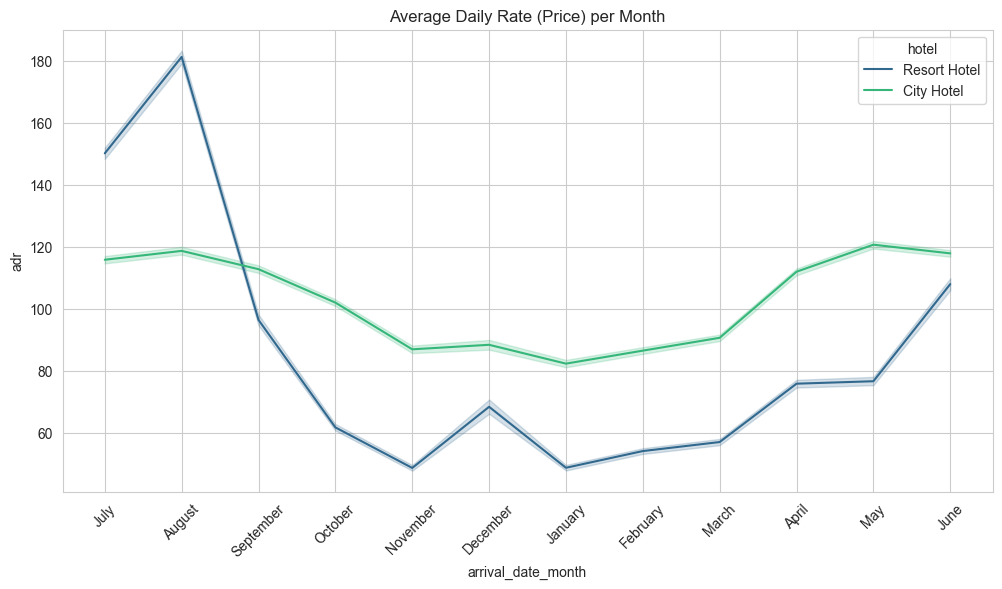

In [7]:
# Filter out canceled bookings (since we want actual payments)
not_canceled_df = df[df['is_canceled'] == 0]

plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=not_canceled_df, sort=False, palette='viridis')
# Note: Sorting months is important for proper visualization, we could use the previous 'months_order' for sorting.
plt.title("Average Daily Rate (Price) per Month")
plt.xticks(rotation=45)
plt.show()


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_2404\1284888613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


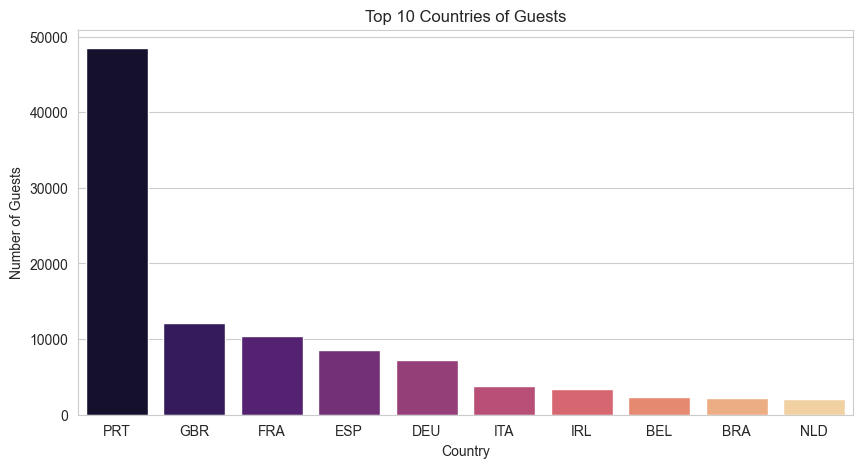

In [8]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title("Top 10 Countries of Guests")
plt.xlabel("Country")
plt.ylabel("Number of Guests")
plt.show()


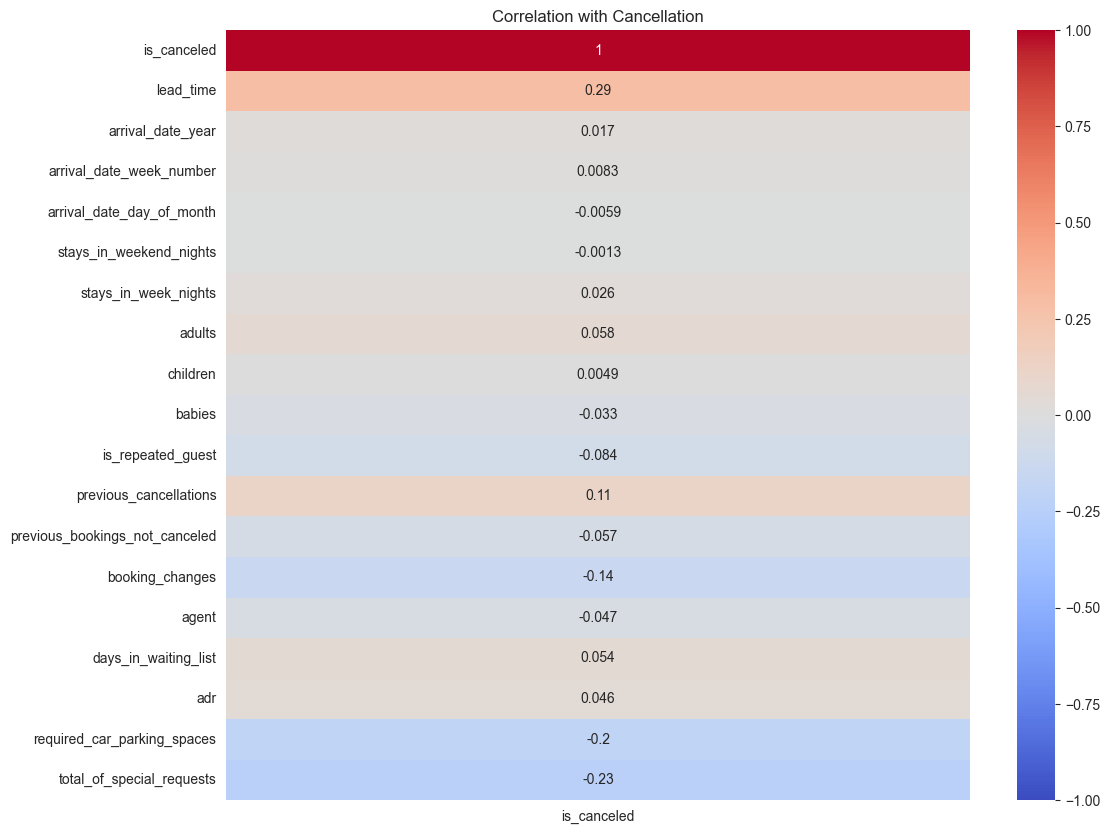

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['is_canceled']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Cancellation")
plt.show()
